<span style="font-size: 14px;color:blue"><b>*Project Scope*</b></span>
<br>.......
<br>.......
<br>**Objectives** 
<br>.......
<br>.......

**Data Source**
<br>........

**This script performs data cleaning and outlier detection on the raw .... dataset. It handles missing values,
removes duplicates, and identifies potential outliers using appropriate techniques. The cleaned data is then
saved as a pickle file for further analysis and exploratory data analysis (EDA).**

<span style="font-size: 22px;color:blue">1.Import Libraries</span>

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import holidays
from pyproj import Proj, transform
from datetime import datetime
from IPython.display import display


<span style="font-size: 22px;color:blue">2.Read datasets</span>

In [69]:
loan =pd.read_excel('../../02 Data/Original Data/internal/data.xlsx')
   # G:\MyGitHubRepositories\MyDataProjects\Vehicle-Loan-Default-Prediction\02 Data\Original Data\Internal


<span style="font-size: 22px;color:blue">3.Quickly explore the data</span>

In [7]:
loan.head()

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Date.of.Birth,Employment.Type,...,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,loan_default
0,420825,50578,58400,89.55,67,22807,45,1441,1984-01-01,Salaried,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
1,417566,53278,61360,89.63,67,22807,45,1497,1985-08-24,Self employed,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
2,539055,52378,60300,88.39,67,22807,45,1495,1977-12-09,Self employed,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,1,1
3,529269,46349,61500,76.42,67,22807,45,1502,1988-06-01,Salaried,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
4,563215,43594,78256,57.50,67,22744,86,1499,1994-07-14,Self employed,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0


In [158]:
print ( 'This dataset includes {} observations and {} columns.'.format(loan.shape[0] , loan.shape[1]))

This dataset includes 233154 observations and 41 columns.


In [81]:
loan.info()
print("\n It seems that we have missing value for employee type.")
print(" Some variables need to be renamed; their current names are not compatible with Python conventions.")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233154 entries, 0 to 233153
Data columns (total 41 columns):
 #   Column                               Non-Null Count   Dtype         
---  ------                               --------------   -----         
 0   UniqueID                             233154 non-null  int64         
 1   disbursed_amount                     233154 non-null  int64         
 2   asset_cost                           233154 non-null  int64         
 3   ltv                                  233154 non-null  float64       
 4   branch_id                            233154 non-null  int64         
 5   supplier_id                          233154 non-null  int64         
 6   manufacturer_id                      233154 non-null  int64         
 7   Current_pincode_ID                   233154 non-null  int64         
 8   Date.of.Birth                        233154 non-null  datetime64[ns]
 9   Employment.Type                      225493 non-null  object        
 

<span style="font-size: 22px;color:blue">4.Data cleaning </span>

 <span style="font-size: 22px;color:blue">-Renaming variables, replaceing "." by  "_"  </span>

In [70]:
loan.columns  = loan.columns.str.replace(".","_") ;
loan.head()

C:\Users\M\AppData\Local\Temp\ipykernel_23564\4106687785.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  loan.columns  = loan.columns.str.replace(".","_") ;


,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Date_of_Birth,Employment_Type,...,SEC_SANCTIONED_AMOUNT,SEC_DISBURSED_AMOUNT,PRIMARY_INSTAL_AMT,SEC_INSTAL_AMT,NEW_ACCTS_IN_LAST_SIX_MONTHS,DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS,AVERAGE_ACCT_AGE,CREDIT_HISTORY_LENGTH,NO_OF_INQUIRIES,loan_default
0,420825,50578,58400,89.55,67,22807,45,1441,1984-01-01,Salaried,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
1,417566,53278,61360,89.63,67,22807,45,1497,1985-08-24,Self employed,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
2,539055,52378,60300,88.39,67,22807,45,1495,1977-12-09,Self employed,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,1,1
3,529269,46349,61500,76.42,67,22807,45,1502,1988-06-01,Salaried,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
4,563215,43594,78256,57.50,67,22744,86,1499,1994-07-14,Self employed,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0


 <span style="font-size: 22px;color:blue">-Finding and Dealing with missing vlaues  </span>

In [83]:
loan.isna().sum() 

UniqueID                                  0
disbursed_amount                          0
asset_cost                                0
ltv                                       0
branch_id                                 0
supplier_id                               0
manufacturer_id                           0
Current_pincode_ID                        0
Date_of_Birth                             0
Employment_Type                        7661
DisbursalDate                             0
State_ID                                  0
Employee_code_ID                          0
MobileNo_Avl_Flag                         0
Aadhar_flag                               0
PAN_flag                                  0
VoterID_flag                              0
Driving_flag                              0
Passport_flag                             0
PERFORM_CNS_SCORE                         0
PERFORM_CNS_SCORE_DESCRIPTION             0
PRI_NO_OF_ACCTS                           0
PRI_ACTIVE_ACCTS                

#### Missing value treatment for Employement_Type
#### Let's check if we could find Employement_Type by other columns like "asset_cost. 

In [84]:
loan.Employment_Type.unique()

array(['Salaried', 'Self employed', nan], dtype=object)

In [71]:
salaried_mean = loan[loan.Employment_Type == 'Salaried'].asset_cost.mean()
self_employed_mean = loan[loan.Employment_Type == 'Self employed'].asset_cost.mean()
print("Asset_cost's average for Salaried EmploymentType : {} ". format(salaried_mean))
print("Aset_cost's average for Self Employed EmploymentType : {} ". format(self_employed_mean))
print("There is no significant difference in the averages between the two groups. Therefore, this variable may not be helpful for imputing Employment_type")

Asset_cost's average for Salaried EmploymentType : 74395.27703406978 
Aset_cost's average for Self Employed EmploymentType : 76578.66417518706 
There is no significant difference in the averages between the two groups. Therefore, this variable may not be helpful for imputing Employment_type


<AxesSubplot:ylabel='asset_cost'>

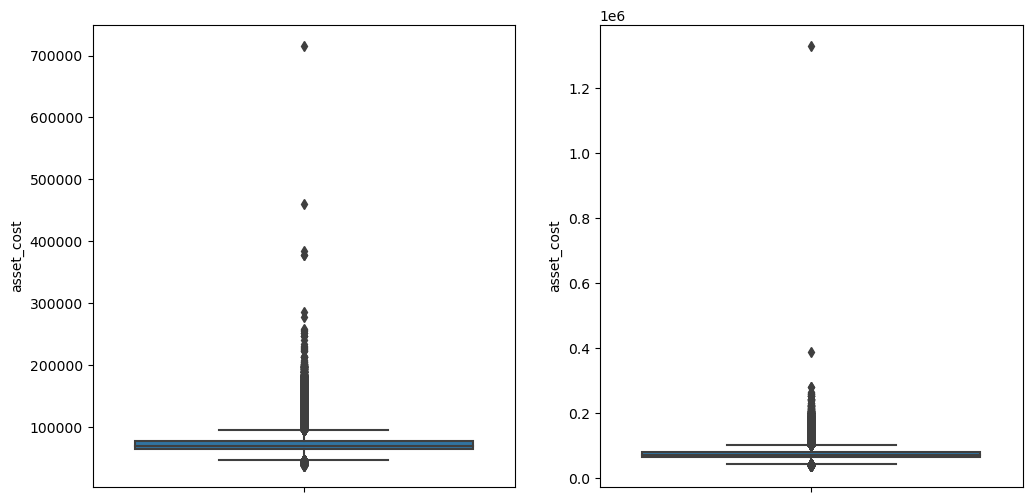

In [142]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
sns.boxplot(data = loan[loan.Employment_Type =='Salaried'] , y = 'asset_cost' , ax=axes[0])
sns.boxplot(data = loan[loan.Employment_Type =='Self employed'] , y = 'asset_cost' , ax=axes[1])


In [72]:
# I used mode for missing value imputation
loan.Employment_Type.fillna(loan.Employment_Type.mode()[0],inplace=True)

In [16]:
loan.isna().sum()

UniqueID                               0
disbursed_amount                       0
asset_cost                             0
ltv                                    0
branch_id                              0
supplier_id                            0
manufacturer_id                        0
Current_pincode_ID                     0
Date_of_Birth                          0
Employment_Type                        0
DisbursalDate                          0
State_ID                               0
Employee_code_ID                       0
MobileNo_Avl_Flag                      0
Aadhar_flag                            0
PAN_flag                               0
VoterID_flag                           0
Driving_flag                           0
Passport_flag                          0
PERFORM_CNS_SCORE                      0
PERFORM_CNS_SCORE_DESCRIPTION          0
PRI_NO_OF_ACCTS                        0
PRI_ACTIVE_ACCTS                       0
PRI_OVERDUE_ACCTS                      0
PRI_CURRENT_BALA

 <span style="font-size: 22px;color:blue">-Finding and Removing Duplicates </span> 
<BR> No duplicates found


In [7]:
loan[loan.duplicated()]

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Date_of_Birth,Employment_Type,...,SEC_SANCTIONED_AMOUNT,SEC_DISBURSED_AMOUNT,PRIMARY_INSTAL_AMT,SEC_INSTAL_AMT,NEW_ACCTS_IN_LAST_SIX_MONTHS,DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS,AVERAGE_ACCT_AGE,CREDIT_HISTORY_LENGTH,NO_OF_INQUIRIES,loan_default


 <span style="font-size: 22px;color:blue">-Finding Inconsistant texts and typos </span>
 <span style="font-size: 22px;color:blue">-Fixing Inconsistant texts and typos </span>

 <span style="font-size: 22px;color:blue">-converting AVERAGE_ACCT_AGE and CREDIT_HISTORY_LENGTH to months </span>

In [73]:
# This function converts "xyrs ymon" to the number of months
def convert_to_month(duration) :
    # extract year and month 
    years = int(duration.split()[0].replace('yrs','').replace('years',''))
    months = int(duration.split()[1].replace('mon' ,'').replace('months',''))
    # convert to months and return
    return ( years * 12  + months )
# Apply the function to those columns
loan['AVERAGE_ACCT_AGE'] = loan['AVERAGE_ACCT_AGE'].apply(convert_to_month)
loan['CREDIT_HISTORY_LENGTH'] = loan['CREDIT_HISTORY_LENGTH'].apply(convert_to_month)
#loan[(loan.AVERAGE_ACCT_AGE != 0 ) | (loan.CREDIT_HISTORY_LENGTH != 0)]

 <span style="font-size: 22px;color:blue">-converting Date_of_Birth to Age and  DisbursalDate to Disbursal_time</span>

In [74]:
# Convert the "Date_of_Birth" column to datetime
loan['Date_of_Birth'] = pd.to_datetime(loan['Date_of_Birth'])

# Calculate the age based on the current date
current_date = datetime.now()
loan['Age'] = (current_date - loan['Date_of_Birth']).astype('<m8[Y]')
loan['DisbursalTime'] = (current_date - loan['DisbursalDate']).astype('<m8[Y]')

# Drop Dat_of_Birth column
loan = loan.drop('Date_of_Birth' , axis = 1)
loan = loan.drop('DisbursalDate' , axis = 1)

In [81]:
loan.dtypes

UniqueID                                 int64
disbursed_amount                         int64
asset_cost                               int64
ltv                                    float64
branch_id                                int64
supplier_id                              int64
manufacturer_id                          int64
Current_pincode_ID                       int64
Employment_Type                         object
State_ID                                 int64
Employee_code_ID                         int64
MobileNo_Avl_Flag                        int64
Aadhar_flag                              int64
PAN_flag                                 int64
VoterID_flag                             int64
Driving_flag                             int64
Passport_flag                            int64
PERFORM_CNS_SCORE                        int64
PERFORM_CNS_SCORE_DESCRIPTION           object
PRI_NO_OF_ACCTS                          int64
PRI_ACTIVE_ACCTS                         int64
PRI_OVERDUE_A

 <span style="font-size: 22px;color:blue">-assign predefined risk categories to values in the 'PERFORM_CNS_SCORE_DESCRIPTION' column, helping to categorize and analyze the data based on specific risk level </span>

In [147]:
loan.PERFORM_CNS_SCORE_DESCRIPTION.value_counts()

No Bureau History Available                                116950
C-Very Low Risk                                             16045
A-Very Low Risk                                             14124
D-Very Low Risk                                             11358
B-Very Low Risk                                              9201
M-Very High Risk                                             8776
F-Low Risk                                                   8485
K-High Risk                                                  8277
H-Medium Risk                                                6855
E-Low Risk                                                   5821
I-Medium Risk                                                5557
G-Low Risk                                                   3988
Not Scored: Sufficient History Not Available                 3765
J-High Risk                                                  3748
Not Scored: Not Enough Info available on the customer        3672
Not Scored

In [75]:
PERFORM_CNS_SCORE_DESCRIPTION_dict = {
                                        'C-Very Low Risk'  :  'low'     ,
                                        'A-Very Low Risk'  :  'low'     ,
                                        'D-Very Low Risk'  :  'low'     ,
                                        'B-Very Low Risk'  :  'low'     ,
                                        'M-Very High Risk' :  'high'    ,
                                        'F-Low Risk'       :  'low'     ,
                                        'K-High Risk'      :  'high'    ,
                                        'H-Medium Risk'    :  'medium'  ,
                                        'E-Low Risk'       :  'low'     ,
                                        'I-Medium Risk'    :  'medium'  ,
                                        'G-Low Risk'       :  'low'     ,
                                        'J-High Risk'      :  'high'    ,
                                        'L-Very High Risk' :  'high'    ,
                                        'No Bureau History Available'                             :  'not_available',
                                        'Not Scored: Sufficient History Not Available'            :  'not_scored'   , 
                                        'Not Scored: Not Enough Info available on the customer'   :  'not_scored'   ,
                                        'Not Scored: No Activity seen on the customer (Inactive)' :  'not_scored'   ,    
                                        'Not Scored: No Updates available in last 36 months'      :  'not_scored'   ,     
                                        'Not Scored: Only a Guarantor'                            :  'not_scored'   ,                           
                                        'Not Scored: More than 50 active Accounts found'          :  'not_scored'      
                                        
}

loan.PERFORM_CNS_SCORE_DESCRIPTION = loan.PERFORM_CNS_SCORE_DESCRIPTION.map(PERFORM_CNS_SCORE_DESCRIPTION_dict)
loan.PERFORM_CNS_SCORE_DESCRIPTION.value_counts()

not_available    116950
low               69022
high              21935
not_scored        12835
medium            12412
Name: PERFORM_CNS_SCORE_DESCRIPTION, dtype: int64

 <span style="font-size: 22px;color:blue">-Create year, month, and day column for DisbursalDate </span>

In [76]:
loan['DisbursalDate_Year'] = pd.to_datetime(loan.DisbursalDate).dt.year
loan['DisbursalDate_Month'] = pd.to_datetime(loan.DisbursalDate).dt.month
loan['DisbursalDate_Day'] = pd.to_datetime(loan.DisbursalDate).dt.day

AttributeError: 'DataFrame' object has no attribute 'DisbursalDate'

 <span style="font-size: 22px;color:blue">-Create Age group column  </span>

In [77]:
# Define the bin edges and labels
bin_edges = [0, 18, 30, 45, 60, 100]  # Adjust the age ranges as needed
bin_labels = ['0-18', '19-30', '31-45', '46-60', '61+']

# Create a new column 'Age_Group' with the bin labels
loan['Age_Group'] = pd.cut(loan['Age'], bins=bin_edges, labels=bin_labels)

# Now, 'Age_Group' will contain the age bins for each row


 <span style="font-size: 22px;color:blue">-Finding and Dealing with outliers </span> 

In [13]:
loan.describe()

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,State_ID,Employee_code_ID,...,NEW_ACCTS_IN_LAST_SIX_MONTHS,DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS,AVERAGE_ACCT_AGE,CREDIT_HISTORY_LENGTH,NO_OF_INQUIRIES,loan_default,Age,DisbursalDate_Year,DisbursalDate_Month,DisbursalDate_Day
count,233154.000000,233154.000000,2.331540e+05,233154.000000,233154.000000,233154.000000,233154.000000,233154.000000,233154.000000,233154.000000,...,233154.000000,233154.000000,233154.000000,233154.000000,233154.000000,233154.000000,233154.000000,233154.0,233154.000000,233154.000000
mean,535917.573376,54356.993528,7.586507e+04,74.746530,72.936094,19638.635035,69.028054,3396.880247,7.262243,1549.477148,...,0.381833,0.097481,8.915764,16.252404,0.206615,0.217071,38.962964,2018.0,9.130223,19.800171
std,68315.693711,12971.314171,1.894478e+04,11.456636,69.834995,3491.949566,22.141304,2238.147502,4.482230,975.261278,...,0.955107,0.384439,15.106416,28.581255,0.706498,0.412252,9.819695,0.0,0.834620,8.232266
min,417428.000000,13320.000000,3.700000e+04,10.030000,1.000000,10524.000000,45.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22.000000,2018.0,8.000000,1.000000
25%,476786.250000,47145.000000,6.571700e+04,68.880000,14.000000,16535.000000,48.000000,1511.000000,4.000000,713.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,31.000000,2018.0,8.000000,14.000000
50%,535978.500000,53803.000000,7.094600e+04,76.800000,61.000000,20333.000000,86.000000,2970.000000,6.000000,1451.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,37.000000,2018.0,9.000000,21.000000
75%,595039.750000,60413.000000,7.920175e+04,83.670000,130.000000,23000.000000,86.000000,5677.000000,10.000000,2362.000000,...,0.000000,0.000000,13.000000,24.000000,0.000000,0.000000,46.000000,2018.0,10.000000,27.000000
max,671084.000000,990572.000000,1.628992e+06,95.000000,261.000000,24803.000000,156.000000,7345.000000,22.000000,3795.000000,...,35.000000,20.000000,369.000000,468.000000,36.000000,1.000000,74.000000,2018.0,10.000000,31.000000


In [78]:
columns_to_check = ['disbursed_amount','asset_cost','ltv','NEW_ACCTS_IN_LAST_SIX_MONTHS',
                    'DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS','AVERAGE_ACCT_AGE','CREDIT_HISTORY_LENGTH',
                    'NO_OF_INQUIRIES','Age', 'PRI_NO_OF_ACCTS' , 'PRI_ACTIVE_ACCTS' , 'PRI_OVERDUE_ACCTS' ,
                    'PRI_CURRENT_BALANCE', 'PRI_SANCTIONED_AMOUNT','PRI_DISBURSED_AMOUNT' ,'SEC_NO_OF_ACCTS',
                    'SEC_ACTIVE_ACCTS', 'SEC_OVERDUE_ACCTS','SEC_CURRENT_BALANCE','SEC_SANCTIONED_AMOUNT',
                    'SEC_DISBURSED_AMOUNT','PRIMARY_INSTAL_AMT','SEC_INSTAL_AMT' ]

In [79]:
loan_pri_sec_acc = ['PRI_NO_OF_ACCTS' , 'PRI_ACTIVE_ACCTS' , 'PRI_OVERDUE_ACCTS' , 'PRI_CURRENT_BALANCE', 
                    'PRI_SANCTIONED_AMOUNT','PRI_DISBURSED_AMOUNT' ,'SEC_NO_OF_ACCTS','SEC_ACTIVE_ACCTS',
                    'SEC_OVERDUE_ACCTS','SEC_CURRENT_BALANCE','SEC_SANCTIONED_AMOUNT',
                    'SEC_DISBURSED_AMOUNT','PRIMARY_INSTAL_AMT','SEC_INSTAL_AMT']

loan.iloc[:,21:34].describe()

,PRI_OVERDUE_ACCTS,PRI_CURRENT_BALANCE,PRI_SANCTIONED_AMOUNT,PRI_DISBURSED_AMOUNT,SEC_NO_OF_ACCTS,SEC_ACTIVE_ACCTS,SEC_OVERDUE_ACCTS,SEC_CURRENT_BALANCE,SEC_SANCTIONED_AMOUNT,SEC_DISBURSED_AMOUNT,PRIMARY_INSTAL_AMT,SEC_INSTAL_AMT,NEW_ACCTS_IN_LAST_SIX_MONTHS
count,233154.000000,2.331540e+05,2.331540e+05,2.331540e+05,233154.000000,233154.000000,233154.000000,2.331540e+05,2.331540e+05,2.331540e+05,2.331540e+05,2.331540e+05,233154.000000
mean,0.156549,1.659001e+05,2.185039e+05,2.180659e+05,0.059081,0.027703,0.007244,5.427793e+03,7.295923e+03,7.179998e+03,1.310548e+04,3.232684e+02,0.381833
std,0.548787,9.422736e+05,2.374794e+06,2.377744e+06,0.626795,0.316057,0.111079,1.702370e+05,1.831560e+05,1.825925e+05,1.513679e+05,1.555369e+04,0.955107
min,0.000000,-6.678296e+06,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,-5.746470e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
25%,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
50%,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
75%,0.000000,3.500650e+04,6.250000e+04,6.080000e+04,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,1.999000e+03,0.000000e+00,0.000000
max,25.000000,9.652492e+07,1.000000e+09,1.000000e+09,52.000000,36.000000,8.000000,3.603285e+07,3.000000e+07,3.000000e+07,2.564281e+07,4.170901e+06,35.000000


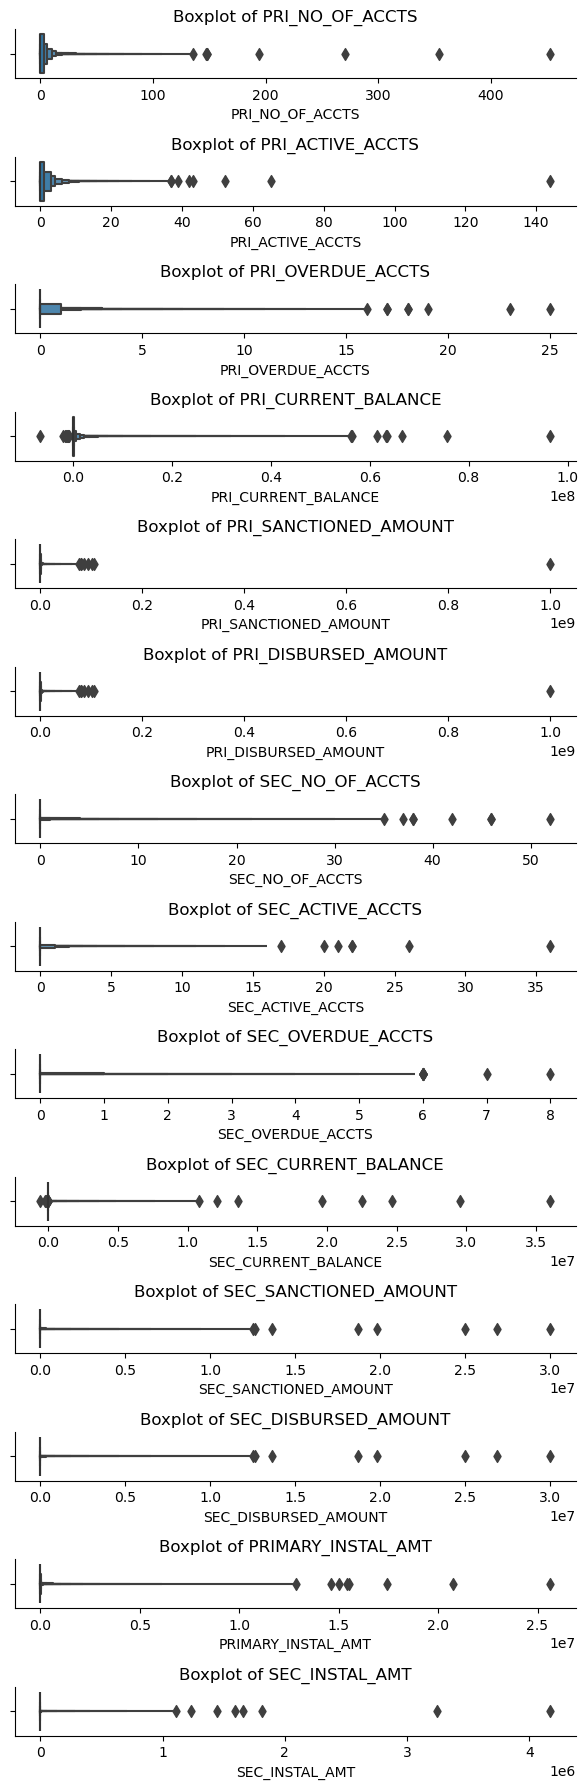

In [64]:
columns =['disbursed_amount','asset_cost','ltv','NEW_ACCTS_IN_LAST_SIX_MONTHS','DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS',
          'AVERAGE_ACCT_AGE','CREDIT_HISTORY_LENGTH','NO_OF_INQUIRIES','Age',]
#for col in loan.columns:
#       if pd.api.types.is_numeric_dtype(loan[col]):
#            columns.append(col)
fig,ax = plt.subplots(len(loan_pri_sec_acc),layout = "tight" , figsize=(6, 18))
plt.subplots_adjust(hspace=4)  # Adjust the vertical spacing
#print(columns)
for col ,ax in zip(loan_pri_sec_acc,ax.flat):
    sns.boxenplot(data=loan,x=col,ax=ax) ;
    sns.despine();
    ax.set_title("Boxplot of " + col)

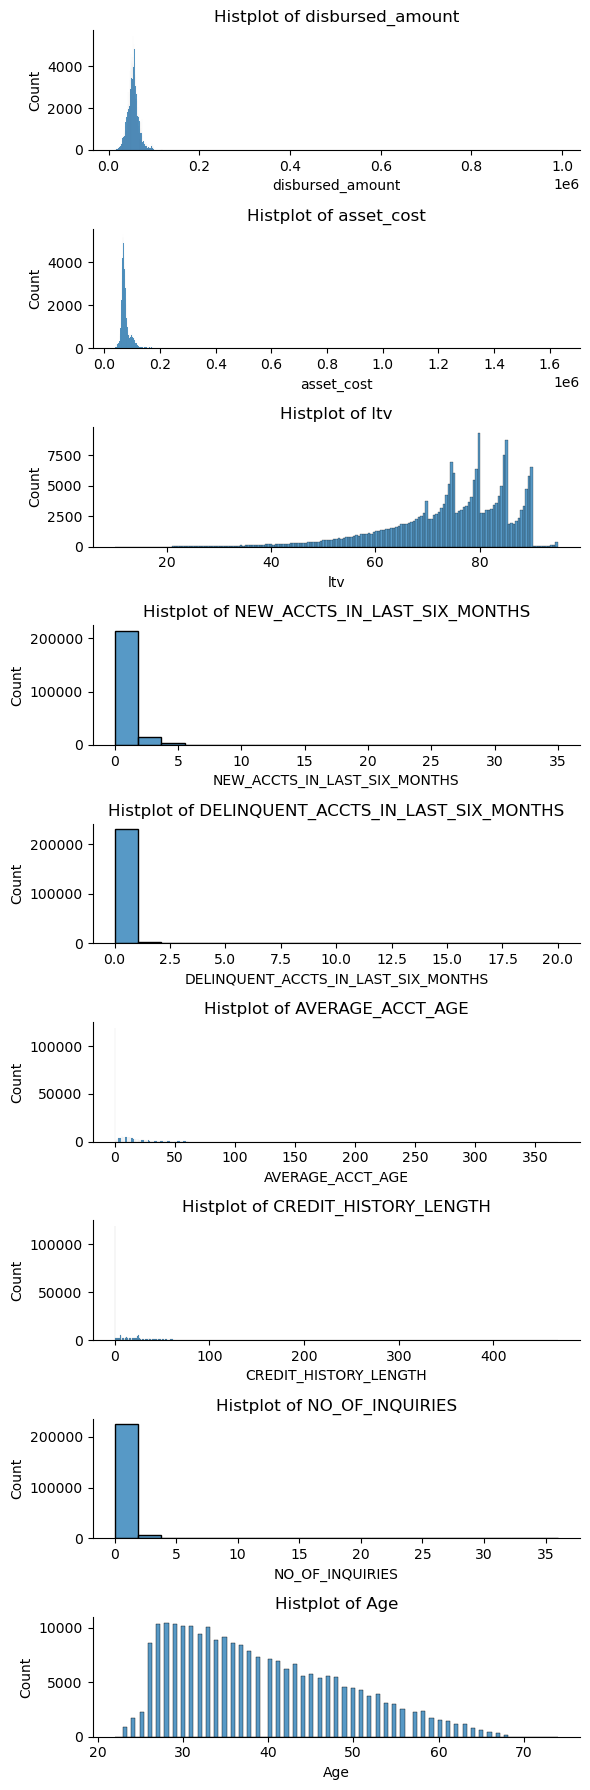

In [15]:
columns =['disbursed_amount','asset_cost','ltv','NEW_ACCTS_IN_LAST_SIX_MONTHS','DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS',
          'AVERAGE_ACCT_AGE','CREDIT_HISTORY_LENGTH','NO_OF_INQUIRIES','Age',]
#for col in loan.columns:
#       if pd.api.types.is_numeric_dtype(loan[col]):
#            columns.append(col)
fig,ax = plt.subplots(len(columns),layout = "tight" , figsize=(6, 18))
plt.subplots_adjust(hspace=1)  # Adjust the vertical spacing
#print(columns)
for col ,ax in zip(columns,ax.flat):
    sns.histplot(data=loan,x=col,ax=ax) ;
    sns.despine();
    ax.set_title("Histplot of " + col)

In [87]:
##################### *******************
#loan['asset_cost'] = np.log1p(loan['asset_cost'])
q25,q75 = np.percentile(loan['asset_cost'],(25,75))
q25,q75
iqr=q75-q25
  
mean  = loan[col].mean()
   # print (mean)
    
lower =  q25 - 1.5 * iqr
upper =  q75 + 1.5 * iqr
    
loan[ (loan['asset_cost']> upper) | (loan['asset_cost']<lower) ]  

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Employment_Type,State_ID,...,SEC_INSTAL_AMT,NEW_ACCTS_IN_LAST_SIX_MONTHS,DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS,AVERAGE_ACCT_AGE,CREDIT_HISTORY_LENGTH,NO_OF_INQUIRIES,loan_default,Age,DisbursalTime,Age_Group
146,532726,72774,11.641908,65.84,130,20700,48,995,Salaried,6,...,0,0,0,0,0,0,0,28.0,5.0,19-30
274,517867,88215,11.691189,76.98,74,16686,48,2578,Salaried,4,...,0,0,0,0,0,1,0,28.0,5.0,19-30
296,563277,58353,11.696563,51.60,11,21475,45,5969,Self employed,3,...,0,0,0,0,0,0,0,33.0,5.0,31-45
315,619790,54259,11.650973,48.78,11,14002,51,5944,Self employed,3,...,0,0,0,0,0,0,0,34.0,4.0,31-45
332,574066,57259,11.598654,54.15,11,24654,49,5944,Self employed,3,...,0,0,0,0,0,0,0,30.0,4.0,19-30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233098,568670,49803,11.689740,43.15,120,23452,48,6927,Self employed,12,...,0,0,1,30,38,0,0,39.0,4.0,31-45
233101,562539,75751,11.601678,71.38,7,23091,51,5805,Self employed,3,...,0,0,0,6,6,0,0,36.0,5.0,31-45
233105,469595,28864,10.631736,74.83,74,16686,48,2611,Salaried,4,...,0,1,0,0,0,0,1,44.0,5.0,31-45
233127,612524,89555,11.655171,79.80,258,24412,86,131,Self employed,16,...,0,0,0,9,28,0,1,48.0,4.0,46-60


In [67]:
print("The number of OUTLIERS for: \n")
number_of_rows = loan.shape[0]
for col in columns_to_check :
    q25,q75 = np.percentile(loan[col],(25,75))
    q25,q75
    iqr=q75-q25
  
    mean  = loan[col].mean()
   # print (mean)
    
    lower =  q25 - 1.5 * iqr
    upper =  q75 + 1.5 * iqr
    
    number_of_outliers =  len(  loan[ (loan[col]> upper) | (loan[col]<lower) ]  )
    percentage_of_outliers =  round( ((number_of_outliers/number_of_rows) * 100 ),2)
    
    def outlier_imputation(dp) :
        if dp >= upper :
            return mean
        elif dp <= lower :
            return mean
        else :
          #  print('xxxx')
            return dp 
 

    
        
    
    print('Column {} : {} which is %{} of the data'.format(col, number_of_outliers ,percentage_of_outliers))
   # If the number of outliers is less than or equal to 10%, I use imputation by mean, else I use percentile method.
          
    if percentage_of_outliers <= 10 :
        loan[col] = loan[col].apply(outlier_imputation)
   
       


The number of OUTLIERS for: 

Column disbursed_amount : 9868 which is %4.23 of the data
Column asset_cost : 19687 which is %8.44 of the data
Column ltv : 6170 which is %2.65 of the data
Column NEW_ACCTS_IN_LAST_SIX_MONTHS : 51660 which is %22.16 of the data
Column DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS : 18195 which is %7.8 of the data
Column AVERAGE_ACCT_AGE : 15924 which is %6.83 of the data
Column CREDIT_HISTORY_LENGTH : 16056 which is %6.89 of the data
Column NO_OF_INQUIRIES : 31193 which is %13.38 of the data
Column Age : 15 which is %0.01 of the data
Column PRI_NO_OF_ACCTS : 21914 which is %9.4 of the data
Column PRI_ACTIVE_ACCTS : 32534 which is %13.95 of the data
Column PRI_OVERDUE_ACCTS : 26275 which is %11.27 of the data
Column PRI_CURRENT_BALANCE : 41044 which is %17.6 of the data
Column PRI_SANCTIONED_AMOUNT : 39587 which is %16.98 of the data
Column PRI_DISBURSED_AMOUNT : 39712 which is %17.03 of the data
Column SEC_NO_OF_ACCTS : 5865 which is %2.52 of the data
Column SEC_ACT

10.760039532538983 10.972756849007364 11.02404070372108 11.093128139551801 11.169688398396127 11.24906408037746 11.50429835826971 11.605331431627164 11.957720254653374


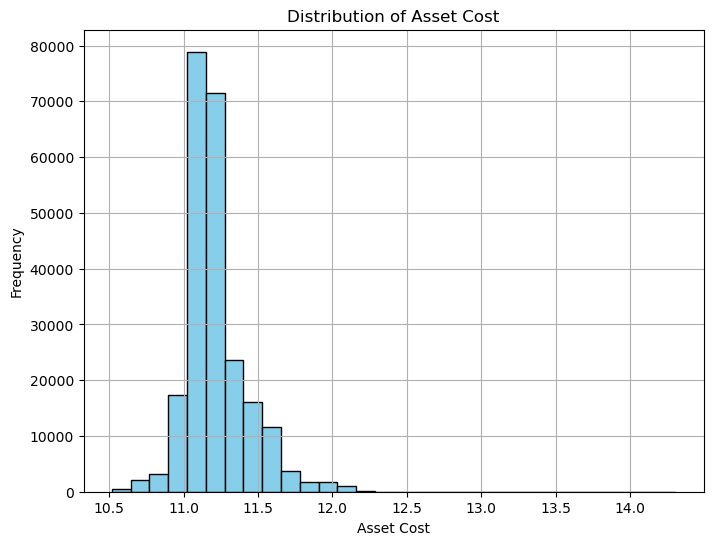

In [81]:
# For these columns we have more than 10% outliers 
# asset_cost ,   NEW_ACCTS_IN_LAST_SIX_MONTHS,   NO_OF_INQUIRIES,    PRI_ACTIVE_ACCTS, 
# PRI_OVERDUE_ACCTS,    PRI_CURRENT_BALANCE, PRI_SANCTIONED_AMOUNT,  PRI_DISBURSED_AMOUNT,    PRIMARY_INSTAL_AMT 

q1,q5,q10,q25,q50,q70,q90,q95,q99 = np.percentile(loan.asset_cost, (1,5,10,25,50,70,90,95,99))

print(q1,q5,q10,q25,q50,q70,q90,q95,q99)
plt.figure(figsize=(8, 6))
plt.hist(loan['asset_cost'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Asset Cost')
plt.xlabel('Asset Cost')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [208]:
loan.loc[loan.asset_cost > q95 , 'asset_cost'] = q95

In [82]:
# For these columns we have more than 10% outliers 
cols = [ 'asset_cost' ,   'NEW_ACCTS_IN_LAST_SIX_MONTHS' ,   'NO_OF_INQUIRIES',    'PRI_ACTIVE_ACCTS', 
 'PRI_OVERDUE_ACCTS',    'PRI_CURRENT_BALANCE', 'PRI_SANCTIONED_AMOUNT',  'PRI_DISBURSED_AMOUNT',    'PRIMARY_INSTAL_AMT' ]
loan[cols].describe()

,asset_cost,NEW_ACCTS_IN_LAST_SIX_MONTHS,NO_OF_INQUIRIES,PRI_ACTIVE_ACCTS,PRI_OVERDUE_ACCTS,PRI_CURRENT_BALANCE,PRI_SANCTIONED_AMOUNT,PRI_DISBURSED_AMOUNT,PRIMARY_INSTAL_AMT
count,233154.000000,233154.000000,233154.000000,233154.000000,233154.000000,2.331540e+05,2.331540e+05,2.331540e+05,2.331540e+05
mean,11.213166,0.381833,0.206615,1.039896,0.156549,1.659001e+05,2.185039e+05,2.180659e+05,1.310548e+04
std,0.206688,0.955107,0.706498,1.941496,0.548787,9.422736e+05,2.374794e+06,2.377744e+06,1.513679e+05
min,10.518700,0.000000,0.000000,0.000000,0.000000,-6.678296e+06,0.000000e+00,0.000000e+00,0.000000e+00
25%,11.093128,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,11.169688,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,11.279766,0.000000,0.000000,1.000000,0.000000,3.500650e+04,6.250000e+04,6.080000e+04,1.999000e+03
max,14.303473,35.000000,36.000000,144.000000,25.000000,9.652492e+07,1.000000e+09,1.000000e+09,2.564281e+07


47099.53 58264.0 61330.0 65717.0 70946.0 76807.0 99140.0 109680.0 109680.0


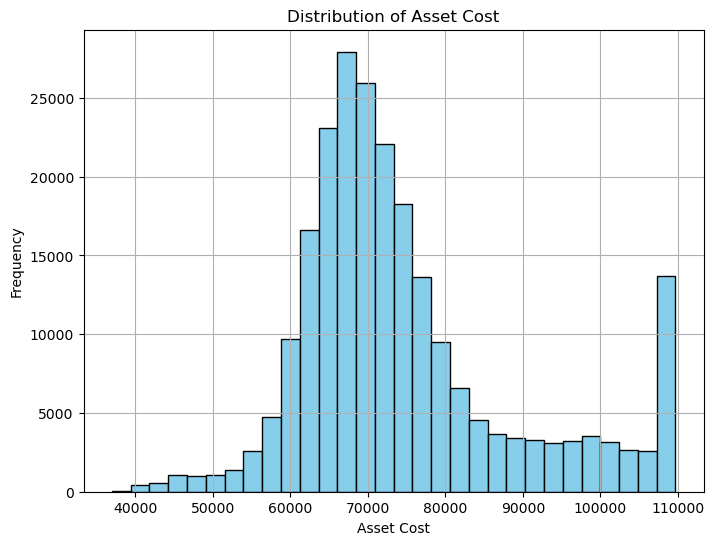

In [210]:
q1,q5,q10,q25,q50,q70,q90,q95,q99 = np.percentile(loan.asset_cost, (1,5,10,25,50,70,90,95,99))
print(q1,q5,q10,q25,q50,q70,q90,q95,q99)
plt.figure(figsize=(8, 6))
plt.hist(loan['asset_cost'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Asset Cost')
plt.xlabel('Asset Cost')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [83]:
import pandas as pd
import numpy as np

# Your list of columns
cols = ['asset_cost', 'NEW_ACCTS_IN_LAST_SIX_MONTHS', 'NO_OF_INQUIRIES',
        'PRI_ACTIVE_ACCTS', 'PRI_OVERDUE_ACCTS', 'PRI_CURRENT_BALANCE',
        'PRI_SANCTIONED_AMOUNT', 'PRI_DISBURSED_AMOUNT', 'PRIMARY_INSTAL_AMT']

# Describe the selected columns and store it in a DataFrame
description = loan[cols].describe()

# Calculate q1 and q5 for the selected columns


# Create a custom DataFrame with q1 and q5 added as rows
custom_description = pd.DataFrame()

# Calculate q1 and q5 for each column and add them to the custom_description DataFrame
for col in cols:
    description = loan[col].describe()
    q1,q5,q10,q25,q50,q70,q75,q90,q95,q99 = np.percentile(loan[col], (1,5,10,25,50,70,75,90,95,99))
    iqr = q75 - q25 
    custom_description[col] = description
    custom_description.at['q1', col] = q1
    custom_description.at['q5', col] = q5
    custom_description.at['q10', col] = q10
    custom_description.at['q25', col] = q25
    custom_description.at['q50', col] = q50
    custom_description.at['q70', col] = q70
    custom_description.at['q90', col] = q90
    custom_description.at['q95', col] = q95
    custom_description.at['q99', col] = q99
    custom_description.at['iqr', col] = iqr

# Print the custom description
custom_description



,asset_cost,NEW_ACCTS_IN_LAST_SIX_MONTHS,NO_OF_INQUIRIES,PRI_ACTIVE_ACCTS,PRI_OVERDUE_ACCTS,PRI_CURRENT_BALANCE,PRI_SANCTIONED_AMOUNT,PRI_DISBURSED_AMOUNT,PRIMARY_INSTAL_AMT
count,233154.000000,233154.000000,233154.000000,233154.000000,233154.000000,2.331540e+05,2.331540e+05,2.331540e+05,2.331540e+05
mean,11.213166,0.381833,0.206615,1.039896,0.156549,1.659001e+05,2.185039e+05,2.180659e+05,1.310548e+04
std,0.206688,0.955107,0.706498,1.941496,0.548787,9.422736e+05,2.374794e+06,2.377744e+06,1.513679e+05
min,10.518700,0.000000,0.000000,0.000000,0.000000,-6.678296e+06,0.000000e+00,0.000000e+00,0.000000e+00
25%,11.093128,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,11.169688,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,11.279766,0.000000,0.000000,1.000000,0.000000,3.500650e+04,6.250000e+04,6.080000e+04,1.999000e+03
max,14.303473,35.000000,36.000000,144.000000,25.000000,9.652492e+07,1.000000e+09,1.000000e+09,2.564281e+07
q1,10.760040,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
q5,10.972757,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00


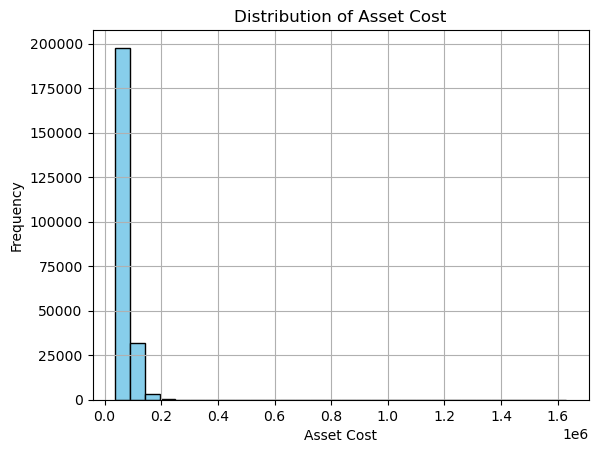

In [31]:
# Asset_cost  outlier treatment 
plt.hist(loan['asset_cost'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Asset Cost')
plt.xlabel('Asset Cost')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()
upper =  custom_description.iloc[14,0]
loan.loc[loan.asset_cost > upper , 'asset_cost'] = upper


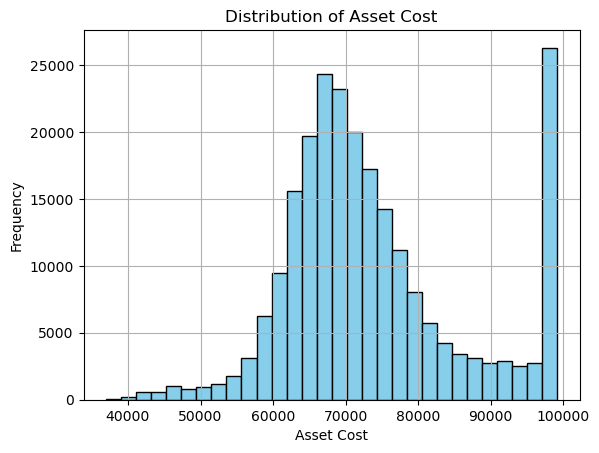

In [32]:
plt.hist(loan['asset_cost'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Asset Cost')
plt.xlabel('Asset Cost')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [34]:
q25,q75 = np.percentile(loan['asset_cost'],(25,75))
q25,q75
iqr=q75-q25
lower =  q25 - 1.5 * iqr
upper =  q75 + 1.5 * iqr
number_of_outliers =  len(  loan[ (loan['asset_cost']> upper) | (loan['asset_cost']<lower) ]  )
number_of_outliers

1451

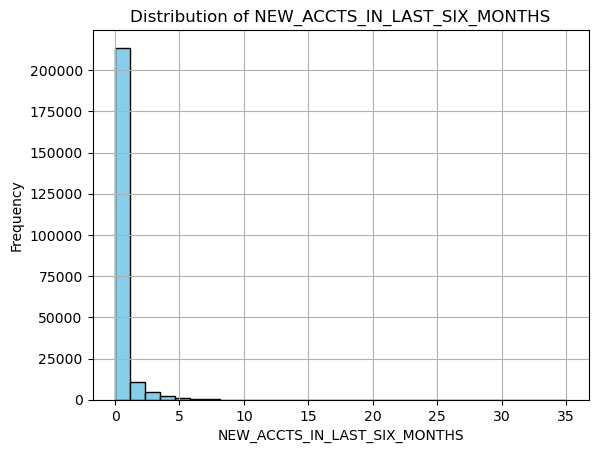

In [35]:
# NEW_ACCTS_IN_LAST_SIX_MONTHS  outlier treatment 
plt.hist(loan['NEW_ACCTS_IN_LAST_SIX_MONTHS'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of NEW_ACCTS_IN_LAST_SIX_MONTHS')
plt.xlabel('NEW_ACCTS_IN_LAST_SIX_MONTHS')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()
#upper =  custom_description.iloc[14,1]
#loan.loc[loan.asset_cost > upper , 'NEW_ACCTS_IN_LAST_SIX_MONTHS'] = upper

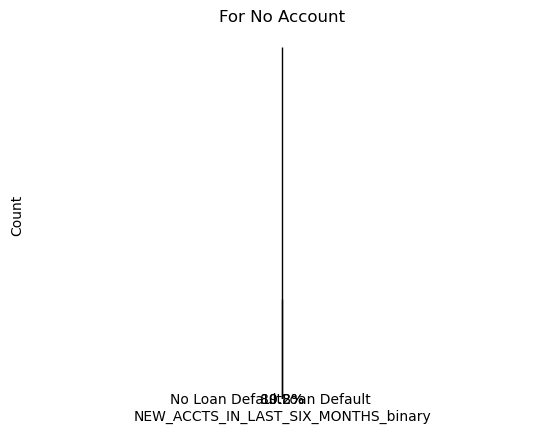

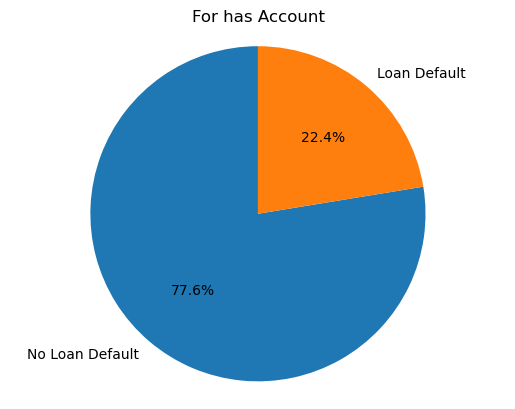

In [48]:
loan['NEW_ACCTS_IN_LAST_SIX_MONTHS_binary'] = np.where(loan['NEW_ACCTS_IN_LAST_SIX_MONTHS'] == 0 , "no_acc" , "has_acc")
sns.histplot(data = loan , x = 'NEW_ACCTS_IN_LAST_SIX_MONTHS_binary')
l_has_new_acc = loan[loan['NEW_ACCTS_IN_LAST_SIX_MONTHS_binary'] == 'has_acc' ] 
l_does_not_have_new_acc =  loan[loan['NEW_ACCTS_IN_LAST_SIX_MONTHS_binary'] == 'no_acc' ] 
counts = l_has_new_acc['loan_default'].value_counts()
labels = ['No Loan Default', 'Loan Default']
sizes = counts.values

plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('For No Account')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


counts = l_does_not_have_new_acc['loan_default'].value_counts()
labels = ['No Loan Default', 'Loan Default']
sizes = counts.values

plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('For has Account')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()



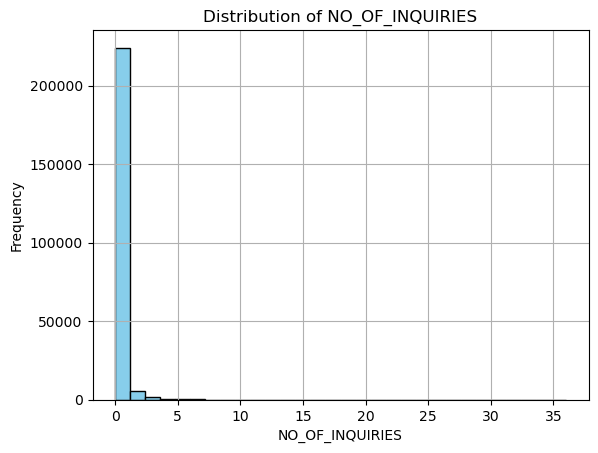

In [49]:
# NO_OF_INQUIRIES  outlier treatment 
plt.hist(loan['NO_OF_INQUIRIES'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of NO_OF_INQUIRIES')
plt.xlabel('NO_OF_INQUIRIES')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()
#upper =  custom_description.iloc[14,1]
#loan.loc[loan.asset_cost > upper , 'NEW_ACCTS_IN_LAST_SIX_MONTHS'] = upper

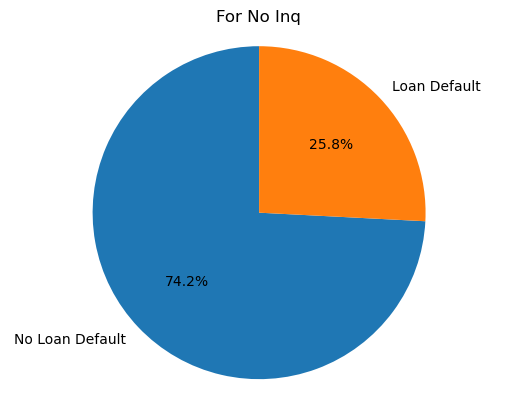

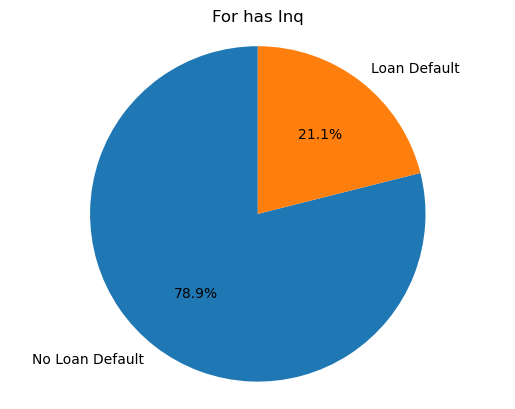

In [52]:
loan['NO_OF_INQUIRIES_Binary'] = np.where(loan['NO_OF_INQUIRIES'] == 0 , "no_inq" , "has_inq")
#sns.histplot(data = loan , x = 'NO_OF_INQUIRIES')
l_has_inq= loan[loan['NO_OF_INQUIRIES_Binary'] == 'has_inq' ] 
l_no_inq =  loan[loan['NO_OF_INQUIRIES_Binary'] == 'no_inq' ] 

counts = l_has_inq['loan_default'].value_counts()
labels = ['No Loan Default', 'Loan Default']
sizes = counts.values

plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('For No Inq')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


counts = l_no_inq['loan_default'].value_counts()
labels = ['No Loan Default', 'Loan Default']
sizes = counts.values

plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('For has Inq')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

C:\Users\M\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='disbursed_amount'>

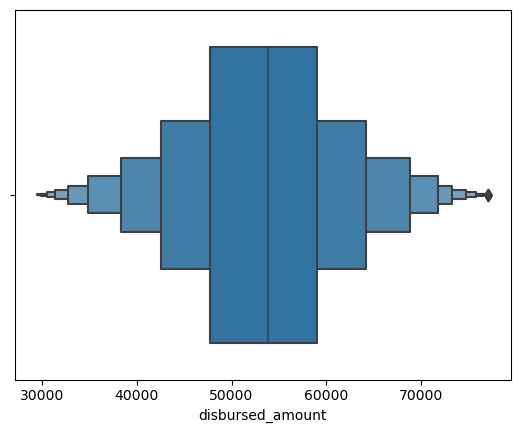

In [72]:
sns.boxenplot(loan.disbursed_amount)

In [76]:
loan.Primdescribe()

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,State_ID,Employee_code_ID,...,NEW_ACCTS_IN_LAST_SIX_MONTHS,DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS,AVERAGE_ACCT_AGE,CREDIT_HISTORY_LENGTH,NO_OF_INQUIRIES,loan_default,Age,DisbursalDate_Year,DisbursalDate_Month,DisbursalDate_Day
count,233154.000000,233154.000000,2.331540e+05,233154.000000,233154.000000,233154.000000,233154.000000,233154.000000,233154.000000,233154.000000,...,233154.000000,233154.000000,233154.000000,233154.000000,233154.000000,233154.000000,233154.000000,233154.0,233154.000000,233154.000000
mean,535917.573376,53458.586652,7.586507e+04,74.746530,72.936094,19638.635035,69.028054,3396.880247,7.262243,1549.477148,...,0.381833,0.097481,8.915764,16.252404,0.206615,0.217071,38.962977,2018.0,9.130223,19.800171
std,68315.693711,9304.915930,1.894478e+04,11.456636,69.834995,3491.949566,22.141304,2238.147502,4.482230,975.261278,...,0.955107,0.384439,15.106416,28.581255,0.706498,0.412252,9.819727,0.0,0.834620,8.232266
min,417428.000000,29484.000000,3.700000e+04,10.030000,1.000000,10524.000000,45.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22.000000,2018.0,8.000000,1.000000
25%,476786.250000,47749.000000,6.571700e+04,68.880000,14.000000,16535.000000,48.000000,1511.000000,4.000000,713.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,31.000000,2018.0,8.000000,14.000000
50%,535978.500000,53803.000000,7.094600e+04,76.800000,61.000000,20333.000000,86.000000,2970.000000,6.000000,1451.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,37.000000,2018.0,9.000000,21.000000
75%,595039.750000,59047.000000,7.920175e+04,83.670000,130.000000,23000.000000,86.000000,5677.000000,10.000000,2362.000000,...,0.000000,0.000000,13.000000,24.000000,0.000000,0.000000,46.000000,2018.0,10.000000,27.000000
max,671084.000000,77122.000000,1.628992e+06,95.000000,261.000000,24803.000000,156.000000,7345.000000,22.000000,3795.000000,...,35.000000,20.000000,369.000000,468.000000,36.000000,1.000000,74.000000,2018.0,10.000000,31.000000


 <span style="font-size: 22px;color:blue"> Provide the statistical description of the quantitative data variables </span> 

#Data Summary: The dataset contains a total of 233,154 records.

Disbursed Amount: The disbursed amount varies with a mean of approximately 53,458.59 and a standard deviation of approximately 9,304.92. The minimum disbursed amount is 29,484, while the maximum disbursed amount is 77,122.

Asset Cost: The asset cost has a mean of approximately 75,865.07 and a standard deviation of approximately 18,944.78. The minimum asset cost is 37,000, and the maximum asset cost is 1,628,992.

Loan-to-Value Ratio (LTV): The LTV ratio has a mean of approximately 74.75, with a standard deviation of approximately 11.46. The LTV ratio ranges from a minimum of 10.03 to a maximum of 95.00.

Branch ID: The branch ID ranges from 1 to 261, with a mean of approximately 72.94.

Supplier ID: Supplier IDs in the dataset vary, with a mean of approximately 19,638.64.

Manufacturer ID: The manufacturer ID varies, with a mean of approximately 69.03.

Current Pincode ID: Current pincode IDs vary with a mean of approximately 3,396.88.

State ID: The state ID ranges from 1 to 22.

Employee Code ID: Employee code IDs vary with a mean of approximately 1,549.48.

New Accounts in Last Six Months: On average, there are 0.38 new accounts in the last six months, with a maximum of 35.

Delinquent Accounts in Last Six Months: On average, there are 0.097 delinquent accounts in the last six months, with a maximum of 20.

Average Account Age: The average account age ranges from 0 to 369 months, with a mean of approximately 8.92 months.

Credit History Length: Credit history length varies widely, with a mean of approximately 16.25 months and a maximum of 468 months.

Number of Inquiries: On average, there are 0.21 inquiries, with a maximum of 36.

Loan Default: The dataset indicates loan default, with 0 indicating non-default and 1 indicating default.

Age: The ages of the individuals in the dataset vary, with a mean of approximately 38.96 years.

Disbursal Date Year: The dataset contains records from the year 2018.

Disbursal Date Month: The disbursal date ranges from August (month 8) to October (month 10).

Disbursal Date Day: The disbursal date ranges from the 1st day of the month to the 31st day.

 <span style="font-size: 22px;color:blue"> Explain how is the target variable distributed overall </span> 

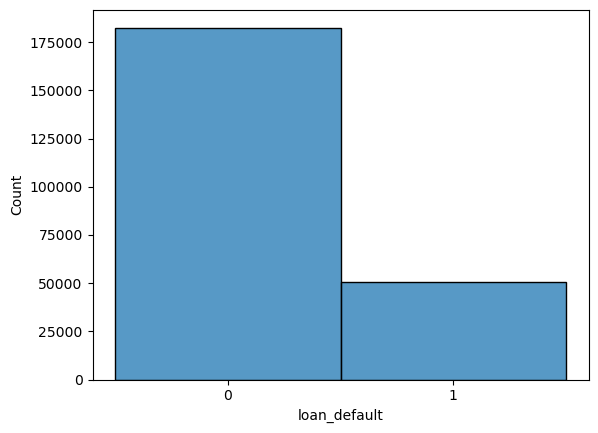

0    182543
1     50611
Name: loan_default, dtype: int64

In [138]:
colors = ["red" , "yellow"]
sns.histplot(loan , x=loan.loan_default , discrete = True , multiple='stack')
plt.xticks([0, 1])
plt.show()
loan.loan_default.value_counts()



 <span style="font-size: 22px;color:blue"> Study the distribution of the target variable across various categories like branch, city, state, branch, supplier, manufacturer, etc. </span> 


In [141]:
display(
        loan
            .groupby(['branch_id','loan_default'])['UniqueID']
            .count()
            .reset_index()
            .rename(columns = {'UniqueID' : 'count'})
            .sort_values(by = 'count' , ascending = False))

display(loan.groupby(['supplier_id','loan_default'])['UniqueID'].count().reset_index().rename(columns = {'UniqueID' : 'count'}))
display(loan.groupby(['manufacturer_id','loan_default'])['UniqueID'].count().reset_index().rename(columns = {'UniqueID' : 'count'}))

#columns  = ['branch_id' , 'supplier_id']#,'manufacturer_id']
#fig,ax = plt.subplots(len(columns),layout = "tight" , figsize=(6, 10))
#plt.subplots_adjust(hspace=1)  # Adjust the vertical spacing
#for col , ax in zip(columns,ax.flat):
#    d =loan.groupby([col,'loan_default'])['UniqueID'].count().reset_index().rename(columns = {'UniqueID' : 'count'})
#    print(len(d))
#    sns.barplot(data = d  ,x=col , y ='count',hue ='loan_default' )
#    sns.despine();
#    ax.set_title("Boxplot of " + col)
    
    


,branch_id,loan_default,count
2,2,0,10683
60,67,0,9130
4,3,0,7616
6,5,0,7171
36,34,0,6375
...,...,...,...
141,217,1,45
163,261,1,39
85,84,1,31
101,111,1,20


,supplier_id,loan_default,count
0,10524,0,3
1,10524,1,3
2,12311,0,3
3,12312,0,41
4,12312,1,5
...,...,...,...
5560,24797,1,1
5561,24799,0,1
5562,24802,0,2
5563,24803,0,1


,manufacturer_id,loan_default,count
0,45,0,43687
1,45,1,12939
2,48,0,12156
3,48,1,4554
4,49,0,7984
5,49,1,2236
6,51,0,21547
7,51,1,5657
8,67,0,1882
9,67,1,523


<span style="font-size: 22px;color:blue">What are the different employment types given in the data? 
Can a strategy be developed to fill in the missing values (if any)? 
Use pie charts to express the different types of employment that define the defaulters and non-defaulters.</span>

<AxesSubplot:xlabel='Employment_Type', ylabel='count'>

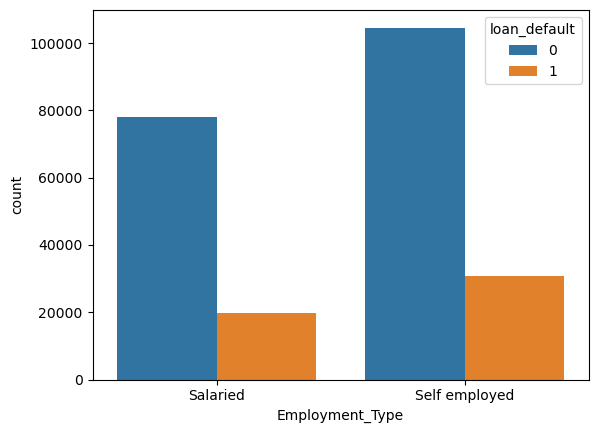

In [144]:
d= loan.groupby(['Employment_Type','loan_default'])['UniqueID'].count().reset_index().rename(columns = {'UniqueID' : 'count'})
sns.barplot(data = d  ,x='Employment_Type' , y ='count',hue ='loan_default' )

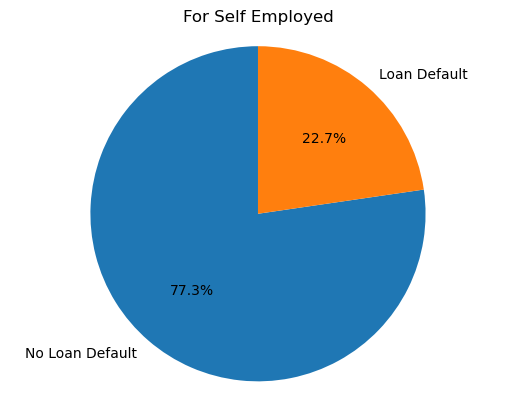

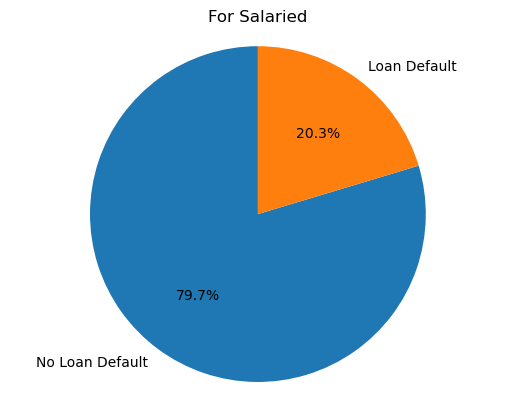

In [146]:
l_self_employed = loan[loan.Employment_Type =='Self employed']
l_salaried = loan[loan.Employment_Type=='Salaried']
counts = l_self_employed['loan_default'].value_counts()
labels = ['No Loan Default', 'Loan Default']
sizes = counts.values

plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('For Self Employed')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

counts = l_salaried['loan_default'].value_counts()
labels = ['No Loan Default', 'Loan Default']
sizes = counts.values

plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('For Salaried')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

<span style="font-size: 22px;color:blue">Has age got anything to do with defaulting?
What is the distribution of age w.r.t. to the defaulters and non-defaulters?</span>


<AxesSubplot:ylabel='Age'>

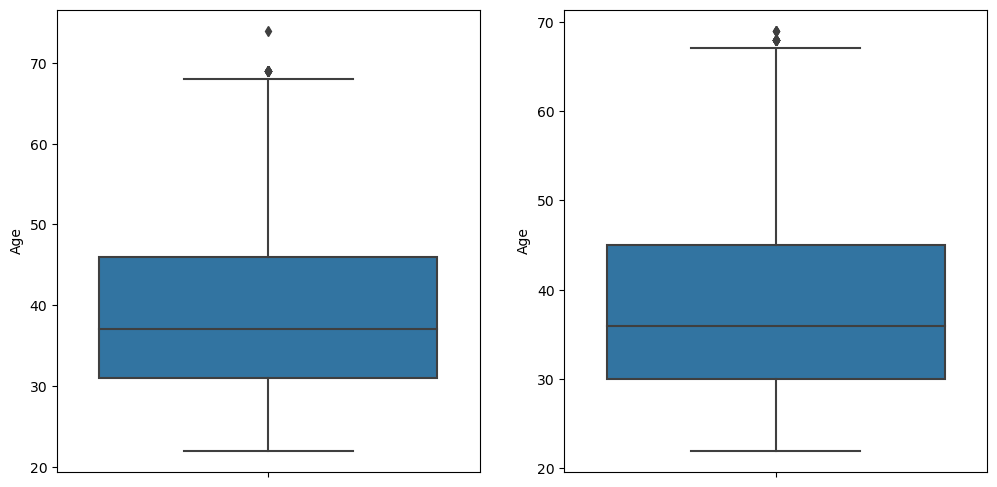

In [216]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
sns.boxplot(data = loan[loan.loan_default ==0] , y = 'Age' , ax=axes[0])
sns.boxplot(data = loan[loan.loan_default ==1] , y = 'Age' , ax=axes[1])

C:\Users\M\anaconda3\lib\site-packages\seaborn\distributions.py:385: UserWarning: `bins` cannot be 'auto' when using weights. Setting `bins=10`, but you will likely want to adjust.
  warnings.warn(msg, UserWarning)


Text(0, 0.5, '')

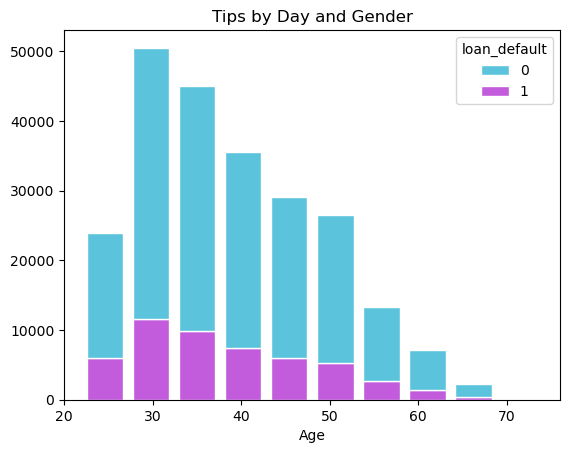

In [217]:
d = loan.groupby(['Age','loan_default']).count()['UniqueID'].reset_index().rename(columns = {'UniqueID':'count'})

ax = sns.histplot(data=d , x = 'Age' , hue = 'loan_default', multiple ='stack' , weights = 'count' , 
            palette=['#24b1d1', '#ae24d1'],
            edgecolor='white',
            shrink=0.8)
ax.set_title('Tips by Day and Gender')
# Remove 'Count' ylabel.
ax.set_ylabel(None)

In [42]:
loan.groupby(['loan_default','Age'])['UniqueID'].count()

loan_default  Age 
0             22.0       5
              23.0     649
              24.0    1342
              25.0    1680
              26.0    6489
                      ... 
1             65.0      97
              66.0      76
              67.0      41
              68.0      15
              69.0       3
Name: UniqueID, Length: 97, dtype: int64

In [178]:
d = loan.groupby(['Age','loan_default']).count()['UniqueID'].reset_index().rename(columns = {'UniqueID':'count'})

#sns.barplot(loan.groupby(['Age'])['loan_default'].count(),x='Age',hue='loan_default' , common_norm=False)

In [179]:
d

,Age,loan_default,count
0,22.0,0,5
1,22.0,1,1
2,23.0,0,659
3,23.0,1,223
4,24.0,0,1335
...,...,...,...
92,68.0,0,115
93,68.0,1,15
94,69.0,0,11
95,69.0,1,3


<span style="font-size: 22px;color:blue">What type of ID was presented by most of the customers for proof?</span>

In [220]:
columns = ['MobileNo_Avl_Flag','Aadhar_flag','PAN_flag','VoterID_flag','Driving_flag','Passport_flag']
column_sums = loan[columns].sum()
print(column_sums)

MobileNo_Avl_Flag    233154
Aadhar_flag          195924
PAN_flag              17621
VoterID_flag          33794
Driving_flag           5419
Passport_flag           496
dtype: int64


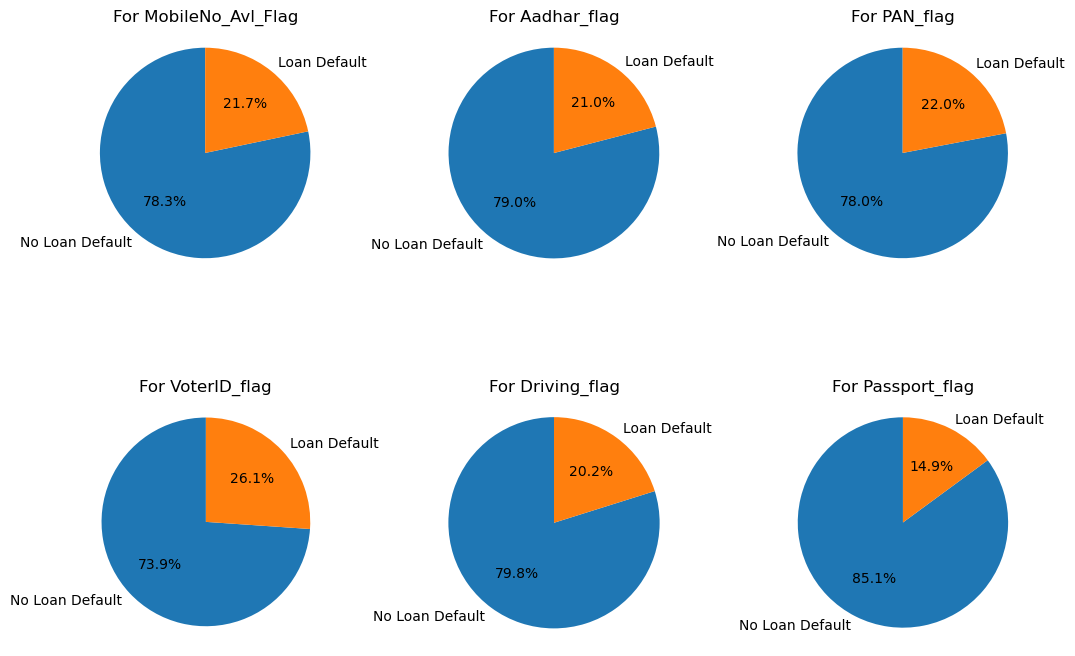

In [227]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 3, figsize=(12, 8))
plt.subplots_adjust(wspace=0.5, hspace=0.5)  # Adjust spacing between subplots

# Define the flags and corresponding titles
flags = ['MobileNo_Avl_Flag', 'Aadhar_flag', 'PAN_flag', 'VoterID_flag', 'Driving_flag', 'Passport_flag']
titles = ['MobileNo_Avl_Flag', 'Aadhar_flag', 'PAN_flag', 'VoterID_flag', 'Driving_flag', 'Passport_flag']

for flag, title, ax in zip(flags, titles, axes.flatten()):
    counts = loan[loan[flag] == 1]['loan_default'].value_counts()
    labels = ['No Loan Default', 'Loan Default']
    sizes = counts.values

    ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
    ax.set_title(f'For {title}')
    ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()



,disbursed_amount,asset_cost,ltv,PERFORM_CNS_SCORE,PRI_NO_OF_ACCTS,PRI_ACTIVE_ACCTS,PRI_OVERDUE_ACCTS,PRI_CURRENT_BALANCE,PRI_SANCTIONED_AMOUNT,PRI_DISBURSED_AMOUNT,...,SEC_DISBURSED_AMOUNT,PRIMARY_INSTAL_AMT,SEC_INSTAL_AMT,NEW_ACCTS_IN_LAST_SIX_MONTHS,DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS,AVERAGE_ACCT_AGE,CREDIT_HISTORY_LENGTH,NO_OF_INQUIRIES,loan_default,Age
disbursed_amount,1.000000,0.752668,0.376747,0.011409,0.034461,0.039542,0.019422,0.015713,0.006294,0.006412,...,-0.005119,0.002350,-0.005525,0.035880,0.020198,0.004205,0.013402,0.038513,0.077675,-0.059905
asset_cost,0.752668,1.000000,-0.301188,-0.047398,-0.026798,-0.021692,-0.014782,-0.004356,-0.001180,-0.001221,...,-0.010594,-0.004356,-0.005738,-0.021968,-0.007932,-0.015614,-0.023563,-0.017301,0.014261,-0.118513
ltv,0.376747,-0.301188,1.000000,0.084993,0.086571,0.087929,0.051770,0.026714,0.009955,0.010177,...,0.008733,0.007358,0.000481,0.083824,0.041921,0.029853,0.053607,0.085725,0.098208,0.081032
PERFORM_CNS_SCORE,0.011409,-0.047398,0.084993,1.000000,0.424574,0.472075,0.107557,0.147822,0.079102,0.078451,...,0.023953,0.071309,0.015655,0.346025,0.164745,0.474734,0.472328,0.152838,-0.057929,0.168105
PRI_NO_OF_ACCTS,0.034461,-0.026798,0.086571,0.424574,1.000000,0.753565,0.351060,0.302673,0.158455,0.157952,...,0.024551,0.269546,0.023421,0.537622,0.314148,0.234612,0.466513,0.180744,-0.035456,0.169804
PRI_ACTIVE_ACCTS,0.039542,-0.021692,0.087929,0.472075,0.753565,1.000000,0.381326,0.416338,0.219774,0.219031,...,0.026325,0.192397,0.021210,0.702943,0.382584,0.295723,0.506247,0.195484,-0.041451,0.145355
PRI_OVERDUE_ACCTS,0.019422,-0.014782,0.051770,0.107557,0.351060,0.381326,1.000000,0.226853,0.116278,0.117912,...,0.016855,0.103095,0.009324,0.109896,0.471564,0.313213,0.425925,0.063780,0.040872,0.139016
PRI_CURRENT_BALANCE,0.015713,-0.004356,0.026714,0.147822,0.302673,0.416338,0.226853,1.000000,0.464729,0.470284,...,0.021152,0.152499,0.006799,0.198566,0.244243,0.146973,0.248439,0.023861,-0.027386,0.085121
PRI_SANCTIONED_AMOUNT,0.006294,-0.001180,0.009955,0.079102,0.158455,0.219774,0.116278,0.464729,1.000000,0.998747,...,0.011843,0.072591,0.003883,0.095074,0.122028,0.083567,0.134541,0.010743,-0.011304,0.048044
PRI_DISBURSED_AMOUNT,0.006412,-0.001221,0.010177,0.078451,0.157952,0.219031,0.117912,0.470284,0.998747,1.000000,...,0.011757,0.073058,0.003806,0.094681,0.122650,0.083373,0.133963,0.010935,-0.011155,0.048079


<AxesSubplot:>

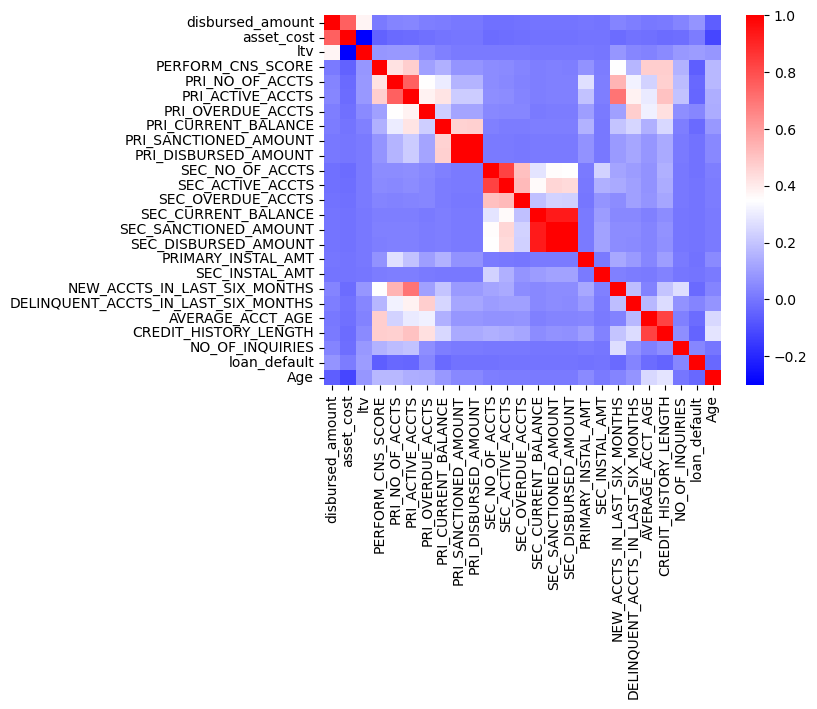

In [26]:
columns_to_exclude = ['UniqueID' ,'branch_id' ,'supplier_id' ,'manufacturer_id','Current_pincode_ID',
                      'Employment_Type' , 'State_ID','Employee_code_ID' ,'DisbursalDate' ,'DisbursalDate_Year' ,
                      'DisbursalDate_Month','DisbursalDate_Day','MobileNo_Avl_Flag', 'Aadhar_flag', 'PAN_flag',
                      'VoterID_flag', 'Driving_flag', 'Passport_flag']
loan_for_corr = loan.drop(columns = columns_to_exclude)
display(loan_for_corr.corr())
sns.heatmap(loan_for_corr.corr()  ,cmap='bwr') # , annot = True)

 <span style="font-size: 22px;color:blue">Study the credit bureau score distribution.
    Compare the distribution for defaulters vs. non-defaulters. Explore in detail.</span>



In [27]:
loan.head(20)

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Employment_Type,DisbursalDate,...,NEW_ACCTS_IN_LAST_SIX_MONTHS,DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS,AVERAGE_ACCT_AGE,CREDIT_HISTORY_LENGTH,NO_OF_INQUIRIES,loan_default,Age,DisbursalDate_Year,DisbursalDate_Month,DisbursalDate_Day
0,420825,50578,58400,89.55,67,22807,45,1441,Salaried,2018-08-03,...,0,0,0,0,0,0,39.0,2018,8,3
1,417566,53278,61360,89.63,67,22807,45,1497,Self employed,2018-08-01,...,0,0,0,0,0,0,38.0,2018,8,1
2,539055,52378,60300,88.39,67,22807,45,1495,Self employed,2018-09-26,...,0,0,0,0,1,1,45.0,2018,9,26
3,529269,46349,61500,76.42,67,22807,45,1502,Salaried,2018-09-23,...,0,0,0,0,0,0,35.0,2018,9,23
4,563215,43594,78256,57.50,67,22744,86,1499,Self employed,2018-10-08,...,0,0,0,0,0,0,29.0,2018,10,8
5,498082,73123,92900,79.66,67,22807,45,1480,Self employed,2018-09-10,...,0,0,0,0,0,0,34.0,2018,9,10
6,586411,55213,68600,83.09,67,22807,45,1494,Salaried,2018-10-18,...,0,0,0,0,0,0,37.0,2018,10,18
7,440293,53713,61780,89.83,67,22807,45,1468,Self employed,2018-08-16,...,0,0,0,0,0,1,55.0,2018,8,16
8,566763,57713,68040,86.27,67,22807,45,1497,Self employed,2018-10-10,...,0,0,0,0,0,1,47.0,2018,10,10
9,525983,46549,69518,69.05,67,22744,86,1480,Salaried,2018-09-21,...,0,0,0,0,0,0,33.0,2018,9,21


Text(0, 0.5, '')

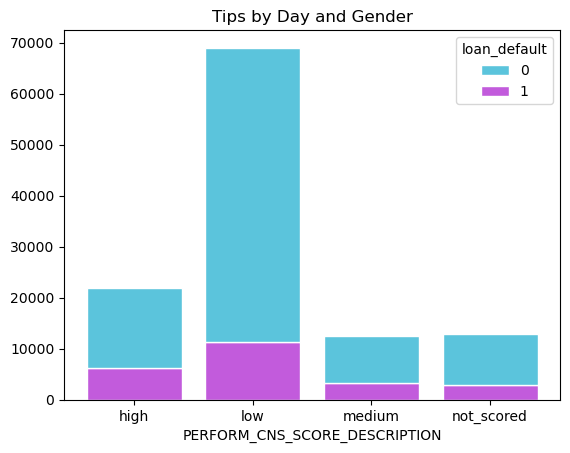

In [39]:
d = loan.groupby(['PERFORM_CNS_SCORE_DESCRIPTION','loan_default']).count()['UniqueID'].reset_index().rename(columns = {'UniqueID':'count'})

ax = sns.histplot(data=d , x = 'PERFORM_CNS_SCORE_DESCRIPTION' , hue = 'loan_default', multiple ='stack' , weights = 'count' , 
            palette=['#24b1d1', '#ae24d1'],
            edgecolor='white',
            shrink=0.8)
ax.set_title('Tips by Day and Gender')
# Remove 'Count' ylabel.
ax.set_ylabel(None)

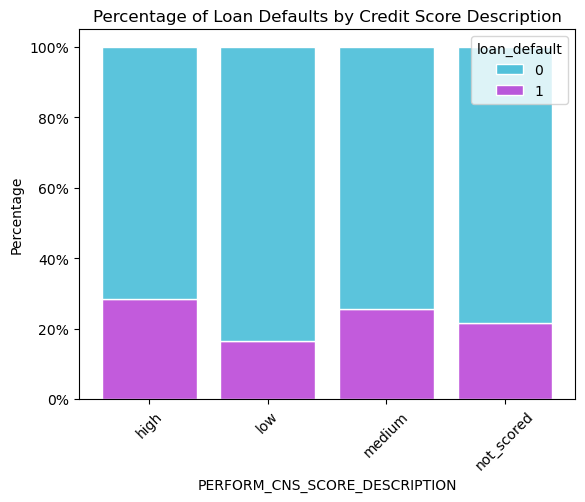

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

d = loan.groupby(['PERFORM_CNS_SCORE_DESCRIPTION','loan_default']).count()['UniqueID'].reset_index().rename(columns = {'UniqueID':'count'})

# Calculate the total count for each category
total_counts = d.groupby('PERFORM_CNS_SCORE_DESCRIPTION')['count'].transform('sum')

# Calculate the percentage
d['percentage'] = (d['count'] / total_counts) * 100

ax = sns.histplot(data=d , x='PERFORM_CNS_SCORE_DESCRIPTION', hue='loan_default', multiple='stack', weights='percentage',
                  palette=['#24b1d1', '#ae24d1'],
                  edgecolor='white',
                  shrink=0.8)
ax.set_title('Percentage of Loan Defaults by Credit Score Description')

# Create a custom y-axis formatter for percentages
def percent_formatter(x, pos):
    return f'{x:.0f}%'

# Apply the custom formatter to the y-axis labels
ax.yaxis.set_major_formatter(mtick.FuncFormatter(percent_formatter))

# Set the y-axis label
ax.set_ylabel('Percentage')

plt.xticks(rotation=45)  # Rotate x-axis labels if needed
plt.show()


In [28]:
loan.PERFORM_CNS_SCORE_DESCRIPTION.unique()

array([nan, 'low', 'medium', 'high', 'not_scored'], dtype=object)

 <span style="font-size: 22px;color:blue">Explore the primary and secondary account details.
    Is the information in some way related to the loan default probability? </span>

In [106]:
import pandas as pd
import pingouin as pg

# Assuming you have a DataFrame 'data' containing your variables
# Replace 'data' and 'Aadhar_flag'/'PAN_flag' with your actual data and column names
df = loan[['Aadhar_flag','PAN_flag']]

tetrachoric_corr = pg.p (df , method  = )

# Print the tetrachoric correlation coefficient
#print(tetrachoric_corr)

In [95]:
tetrachoric_corr = pg.corr (loan['Aadhar_flag'], loan['loan_default'])

# Print the tetrachoric correlation coefficient
print(tetrachoric_corr)

              n         r           CI95%         p-val       BF10  power
pearson  233154 -0.041593  [-0.05, -0.04]  8.640681e-90  1.188e+85    1.0


 <span style="font-size: 22px;color:blue">5-Create New columns </span>

In [ ]:
departure.merge(airports, how ='left' , left_on ='' , right_on  ='Airport_Code')

<span style="font-size: 16px">
****** Data has been cleaned
... columns have been added to the ... data. 
<br> ....                : date of the ... 
.
    
The data frame will be saved in <i>binary</i> format(Pickle) ******
</span> <br> <br>
<span style="font-size: 20px;color:blue">6-Create PICKE file</span>

In [59]:
df.to_pickle('***.pkl')
